In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
data =pd.read_csv('/gdrive/My Drive/bwt.csv')
data

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1


In [0]:
data.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

In [0]:
groupby_smoke = data.groupby('smoke')
groupby_smoke.mean()

,bwt,gestation,parity,age,height,weight
smoke,,,,,,
0,123.047170,288.905660,0.261456,27.656334,64.440701,149.553908
1,114.109504,283.938017,0.250000,26.878099,65.028926,161.061983
9,126.700000,282.400000,0.000000,30.100000,64.300000,139.200000


In [0]:
for smoke, value in groupby_smoke['bwt']:
    print((smoke, value.mean()))

(0, 123.04716981132076)
(1, 114.10950413223141)
(9, 126.7)


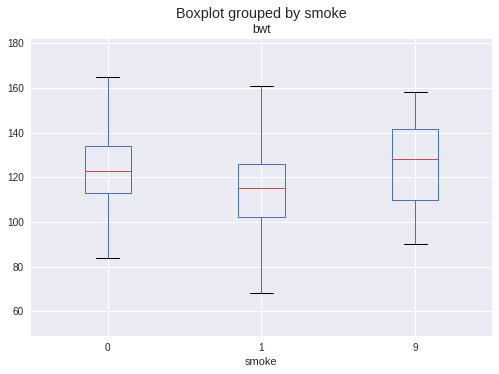

In [0]:
data.boxplot(column=['bwt'],by='smoke')

In [0]:
from scipy import stats
stats.ttest_1samp(data['smoke'], 0)

Ttest_1sampResult(statistic=17.90025598205009, pvalue=6.85944513773638e-64)

In [37]:
smoke0_bwt = data[data['smoke'] == 0]['bwt']
smoke1_bwt = data[data['smoke'] == 1]['bwt']

stats.ttest_ind(smoke0_bwt, smoke1_bwt) 

# smoke0(흡연자) 의 bwt 와 smoke1(비흡연자) 의 bwt 가 같을 확률이 p value 이고, p value는 작은 수 이므로 귀무가정은 틀리고, 두 집단의 bwt 는 다르다는 것을 알 수 있다.
# boxplot을 참고하면 흡연자의 bwt 가 높으므로 흡연자의 신생아 몸무게는 비흡연자의 신생아 몸무게 보다 크다.

Ttest_indResult(statistic=8.652912026048467, pvalue=1.5538497400118202e-17)